In [1]:
import pandas as pd
import numpy as np

In [2]:
from ucimlrepo import fetch_ucirepo

In [3]:
abalone = fetch_ucirepo(id=1)

In [4]:
abaloneData = abalone.data.original

In [5]:
abaloneData.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
abaloneData.shape

(4177, 9)

In [7]:
import matplotlib.pyplot as plt

(array([  17.,  431., 1648., 1388.,  329.,  228.,  100.,   29.,    4.,
           3.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <BarContainer object of 10 artists>)

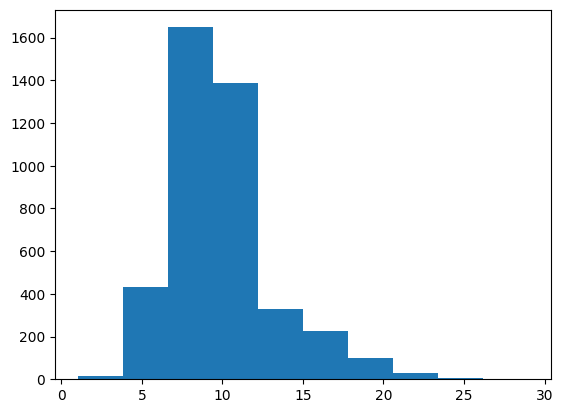

In [14]:
plt.hist(abaloneData.Rings)

In [15]:
abaloneData.Rings.median()

np.float64(9.0)

In [16]:
abaloneData.Rings = np.where(abaloneData.Rings <= 9.0, -1, 1)

In [17]:
abaloneData.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,-1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,-1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,-1


In [ ]:
abaloneData.Sex.value_counts() # I is infant

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [21]:
abaloneData.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [22]:
abaloneData.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [23]:
# untransformed dataset
abaloneData.to_csv('untransformed_ABALONE.csv', index=False)

In [ ]:
# transformed dataset

In [24]:
transformedAbaloneData = abaloneData.copy()

In [25]:
# one hot encoding as opposed to label encoding
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [26]:
categorical_cols = transformedAbaloneData.select_dtypes(include=['object']).columns.tolist()
numerical_cols = transformedAbaloneData.select_dtypes(include=['float64']).columns.tolist()

In [27]:
categorical_cols, numerical_cols

(['Sex'],
 ['Length',
  'Diameter',
  'Height',
  'Whole_weight',
  'Shucked_weight',
  'Viscera_weight',
  'Shell_weight'])

In [28]:
X = transformedAbaloneData

In [29]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [30]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, categorical_cols)
    ]
)

In [32]:
transformedX = preprocessor.fit_transform(X)

In [33]:
numeric_features = [f"{col}_scaled" for col in numerical_cols]
categorical_features = []
for col, categories in zip(categorical_cols, preprocessor.named_transformers_['cat'].named_steps['onehot'].categories_):
    categorical_features.extend([f"{col}_{cat}" for cat in categories])

In [34]:
numeric_features

['Length_scaled',
 'Diameter_scaled',
 'Height_scaled',
 'Whole_weight_scaled',
 'Shucked_weight_scaled',
 'Viscera_weight_scaled',
 'Shell_weight_scaled']

In [35]:
categorical_features

['Sex_F', 'Sex_I', 'Sex_M']

In [36]:
feature_names = numeric_features + categorical_features

In [37]:
transformedAbaloneData = pd.DataFrame(
    transformedX,
    columns=feature_names,
    index=X.index
)

In [38]:
transformedAbaloneData.head()

,Length_scaled,Diameter_scaled,Height_scaled,Whole_weight_scaled,Shucked_weight_scaled,Viscera_weight_scaled,Shell_weight_scaled,Sex_F,Sex_I,Sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,0.0,0.0,1.0
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,0.0,0.0,1.0
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1.0,0.0,0.0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.0,0.0,1.0
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,0.0,1.0,0.0


In [39]:
transformedAbaloneData['Rings'] = abaloneData.Rings

In [40]:
transformedAbaloneData.head()

,Length_scaled,Diameter_scaled,Height_scaled,Whole_weight_scaled,Shucked_weight_scaled,Viscera_weight_scaled,Shell_weight_scaled,Sex_F,Sex_I,Sex_M,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,0.0,0.0,1.0,1
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,0.0,0.0,1.0,-1
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1.0,0.0,0.0,-1
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.0,0.0,1.0,1
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,0.0,1.0,0.0,-1


In [41]:
# output transformed dataset
transformedAbaloneData.to_csv('transformed_ABALONE.csv', index=False)